![alt text](fgv_logo_novo.jpg)

# Machine Learning

## Regressão Logística

Regressão logística é um algoritmo de classificação largamente utilizado em diversas aplicações. Trata-se de um algoritmo simples cujo fitting objetiva minizar um erro de predição. Seu entendimento é uma fase intermediária para abordarmos outros classificadores mais poderosos, por exemplo aqueles baseados em redes neurais.

In [1]:
# import de modulos pandas e numpy
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# import de modulos para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# imports para Machine Learning 
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split # modulo antigo
from sklearn.model_selection import train_test_split

# para avaliacao
from sklearn import metrics

# dataset
import statsmodels.api as sm

/Users/hitoshinagano/code/.virtualenvs/jupyterlab_test/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Função logística

A função logistica [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) recebe como argumento uma valor de $-\infty$ a $+\infty$, e retorna um valor no intervalo $(0,1)$

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

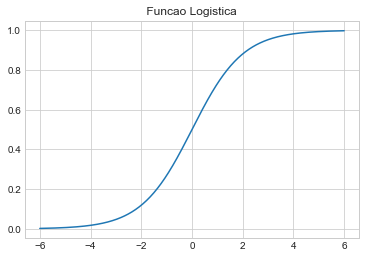

In [2]:
# Função Logistica
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# cria um grade de -6 a 6 ( 500 elementos, igualmente espaçados)
grade_t = np.linspace(-6,6,500)

# calcula os valores de y
p = np.array([logistic(t) for t in grade_t])

# usando exp do numpy que aceita um vetor como argumento
p = 1/(1 + np.exp(-1.0 * grade_t))

# plot
plt.plot(grade_t,p)
plt.title(' Funcao Logistica ');

Consideremos que uma observação seja composta por:
* $\mathbf x = (x_{1}, x_{2} ... , x_{m})$, as $m$ features disponiveis
* $y$, a varíavel que queremos prever 

Na classificação binária, assumimos que $y = 0$ ou $y = 1$. 

A ideia é considerar a função logistica gerando uma probabilidade, a partir de um polinomio:


$$ t(\mathbf x) = w_0 + w_1.x_{1} + w_2.x_{2} ... + w_m.x_{m}$$

onde $w_0, w_1, ..., w_m$ são coeficientes a serem aprendidos, de forma que a equação abaixo:<br>


$$ \hat{y} = Prob[y = 1 \mid \mathbf x]  = $$

$$ \sigma (t(\mathbf x)) = \frac{1}{1+e^{-(w_0 + w_1.x_{1} + w_2.x_{2} ... + w_m.x_{m})}}$$


forneça a 'melhor' estimativa da probabilidade de sucesso, ou seja a probabilidade de que $y$ seja $1$. 

Para tanto o algoritmo procura encontrar os melhores $w_0, w_1, ..., w_m$ que minimizam o erro. 

Uma vez aprendidos os coeficientes, na predição, cada $\mathbf x^{(i)}$ fornecerá seu $\hat{y}^{(i)}$ correspondente, 
onde $i$ denota o indice da amostra.<br>
Se adotarmos um limiar de $0.5$ como a probabilidade que separa as predições entre classes 0 e 1, teremos:
* Se $\hat{y}^{(i)} \leq 0.5$, predição será a classe 0
* Se $\hat{y}^{(i)} > 0.5$, predição será a classe 1

### Exemplo prático

In [3]:
import webbrowser

url = 'http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html'

webbrowser.open_new(url)

True

Quantidade de observações: 6366
Quantidade de features: 9
Definições:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [4]:
# Carregando dataframe 

df = sm.datasets.fair.load_pandas().data

In [5]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
3781,2.0,27.0,2.5,0.0,1.0,20.0,4.0,2.0,0.000000
474,5.0,32.0,16.5,2.0,1.0,14.0,4.0,6.0,0.060606
4608,5.0,27.0,2.5,0.0,3.0,16.0,4.0,4.0,0.000000
5859,3.0,27.0,9.0,2.0,3.0,12.0,5.0,4.0,0.000000
2734,5.0,42.0,23.0,3.0,3.0,12.0,3.0,5.0,0.000000


In [6]:
# Define uma coluna, indicador binário que indica se a pessoa teve um caso extra-conjugal
df['teve_affair'] = [ 1 if a else 0 for a in df.affairs]

In [7]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,teve_affair
1101,1.0,32.0,13.0,3.0,3.0,12.0,2.0,4.0,0.076923,1
1199,3.0,42.0,23.0,3.0,2.0,14.0,2.0,2.0,0.521739,1
2930,5.0,22.0,2.5,1.0,3.0,12.0,3.0,1.0,0.000000,0
6111,4.0,42.0,23.0,3.0,4.0,12.0,2.0,5.0,0.000000,0
1778,4.0,27.0,6.0,0.0,2.0,12.0,3.0,4.0,7.000000,1


In [8]:
# Media por cada label
df.groupby('teve_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
teve_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
# desvio padrão por cada label
df.groupby('teve_affair').std()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
teve_affair,,,,,,,,,
0,0.821099,6.809684,7.101994,1.417410,0.885117,2.211409,0.930512,1.361392,0.000000
1,1.065286,6.699997,7.185216,1.410401,0.840767,2.086742,0.965927,1.314123,3.437478


In [10]:
sns.set_context('poster')

In [11]:
# sns.jointplot(data = df[df.affairs < 2], x = 'age', y = 'affairs')

In [12]:
df.affairs.describe(percentiles=[0, 0.9, 0.99])

count    6366.000000
mean        0.705374
std         2.203374
min         0.000000
0%          0.000000
50%         0.000000
90%         2.000000
99%         7.839996
max        57.599991
Name: affairs, dtype: float64

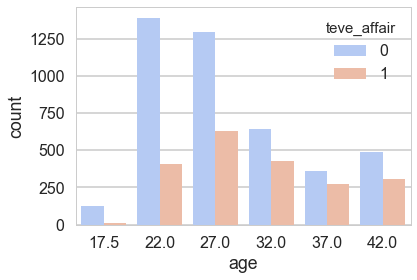

In [13]:
# Countplot com idade
sns.countplot(data=df, x='age', hue='teve_affair', palette='coolwarm')
# sns.distplot(df[df.teve_affair == 0].age)
# sns.distplot(df[df.teve_affair == 1].age)

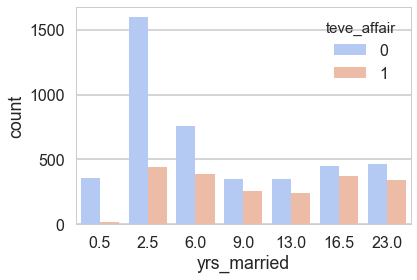

In [14]:
# Countplot com anos de casamento
sns.countplot('yrs_married',data=df,hue='teve_affair',palette='coolwarm')

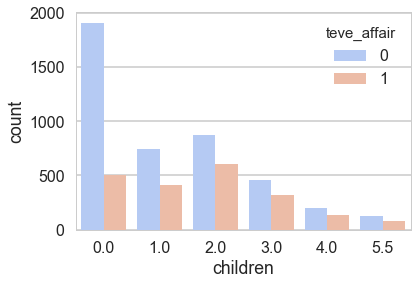

In [15]:
# Countplot com quantidade de filhos
sns.countplot('children',data=df,hue='teve_affair',palette='coolwarm')

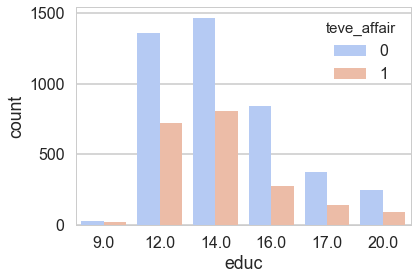

In [16]:
# Countplot com nivel de educação
sns.countplot('educ',data=df,hue='teve_affair',palette='coolwarm')

(0, 15)

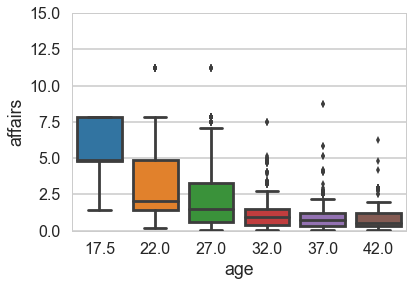

In [17]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por boxplot
sns.boxplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

(-2, 12)

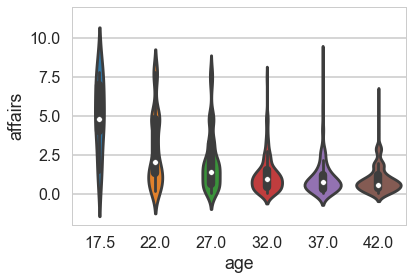

In [18]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por violinplot
sns.violinplot(data=df[(df.affairs > 0) & (df.affairs < 9)], x='age', y = 'affairs')
plt.ylim(-2, 12)

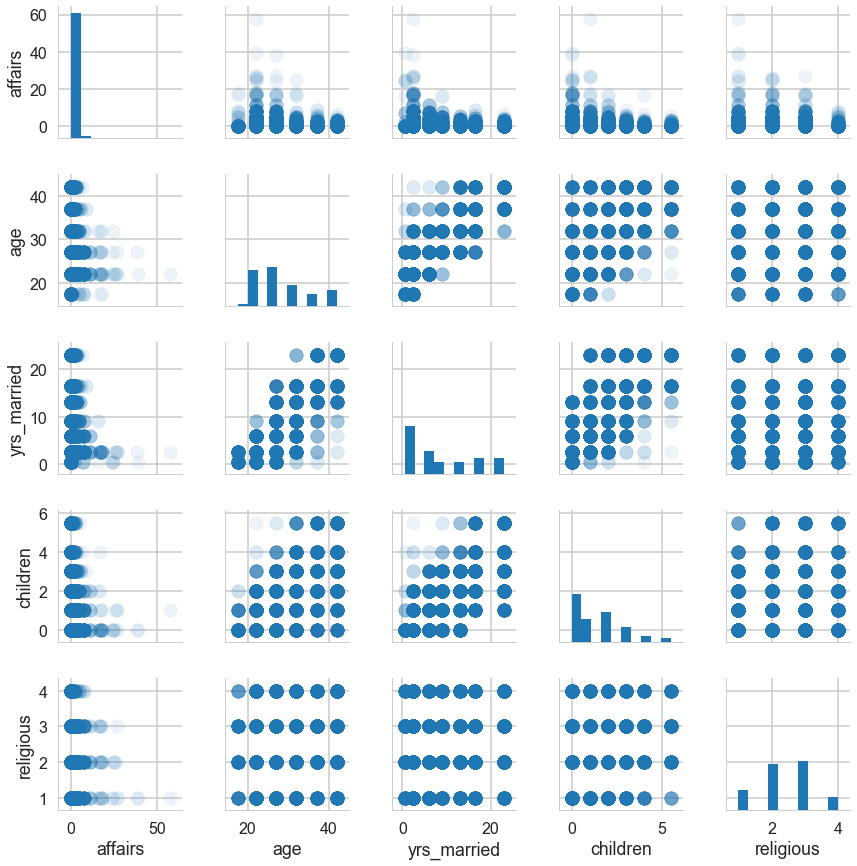

In [19]:
sns.pairplot(data=df[['affairs', 'age', 'yrs_married', 'children', 'religious']], 
        plot_kws = {'alpha':0.08, 's':180, 'edgecolor': None},)

#### pre-processamento

Notamos as variaveis categoricas Occupation e Husband's Occupation. De maneira similar a regressão linear, precisamos tratar essas colunas. Nesse caso, fazemos um OHE (one hot encoding). Importante: Labelencoding não funciona!!

Pandas tem um método para criar esses [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) criando colunas dedicadas para cada valor encontrado.

In [20]:
# Cria novo DataFrame para as colunas categoricas
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [21]:
# Atribui nomes as colunas
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [22]:
# Atribui X primeiramente sem as colunas categoricas 
X = df.drop(['occupation','occupation_husb','teve_affair'],axis=1)

# Concatena os dataframes dummies
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [23]:
# Concatena o X com o dataframe dos dummies
X = pd.concat([X,dummies],axis=1)

# amostragem do X
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
5822,5.0,27.0,2.5,1.0,2.0,12.0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
3984,3.0,42.0,23.0,2.0,3.0,16.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0
5181,5.0,22.0,0.5,0.0,3.0,16.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,1
4424,3.0,32.0,13.0,1.0,2.0,14.0,0.000000,0,0,1,0,0,0,0,0,1,0,0,0
1716,2.0,32.0,9.0,0.0,2.0,16.0,1.361111,0,0,1,0,0,0,0,1,0,0,0,0


#### multicolinearidade

Notar que nos dataframe com as variaveis dummies, uma das colunas é combinação linear das outras.

Por exemplo, o valor da primeira coluna será igual a $1 - \sum_{i=2}^{k} x_i$, onde $x_i$ é o valor da coluna $i$ na mesma observação, e $k$ é a cardinalidade (quantidade de valores possíveis) da coluna categorica original.

Para remediar esse problema, bem simples, basta deletar uma das colunas.

In [24]:
# deletando uma coluna para cada coluna categorica
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# deletando coluna não utilizada
X = X.drop('affairs',axis=1)

# amostragem
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
801,4.0,37.0,23.0,5.5,2.0,9.0,0,1,0,0,0,0,0,1,0,0
796,5.0,32.0,9.0,0.0,3.0,20.0,0,0,0,0,1,0,0,1,0,0
3689,5.0,22.0,0.5,0.0,3.0,14.0,1,0,0,0,0,0,0,1,0,0
3511,3.0,27.0,6.0,0.0,3.0,14.0,0,1,0,0,0,1,0,0,0,0
4803,5.0,22.0,2.5,0.0,2.0,14.0,0,1,0,0,0,0,0,1,0,0


#### alternativa
Por razões didáticas o roteiro acima foi apresentado, mas todo ele pode ser resumido em apenas uma linha:

In [25]:
# X = pd.get_dummies(df, columns=['occupation', 'occupation_husb'], 
#                    drop_first=True).drop(['affairs', 'teve_affair'], axis = 1)

#### separando o vetor y 
Agora que já temos a matriz com as features definidas, vamos retirar a coluna resposta em um vetor a parte ($y$)

In [26]:
# Atribui y a coluna teve_affair
y = df.teve_affair

# amostragem do y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: teve_affair, dtype: int64

In [27]:
# transformando em numpy
y = y.values

# checando resultado
y

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
y.mean()

0.3224945020420987

#### Rodando Regressão Logistica com sklearn 

In [30]:
# Instanciando objeto
log_model = LogisticRegression()

# Treinando o modelo
log_model.fit(X, y)

# Checando acurácia
log_model.score(X, y)

0.7260446120012567

In [31]:
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Checando a percentagem de pessoas com casos extra-conjugais
y.mean()

0.3224945020420987

In [33]:
coeff_df = DataFrame(log_model.coef_)

coeff_df.columns = X.columns

coeff_df = coeff_df.T

coeff_df.columns = ['coeficiente']

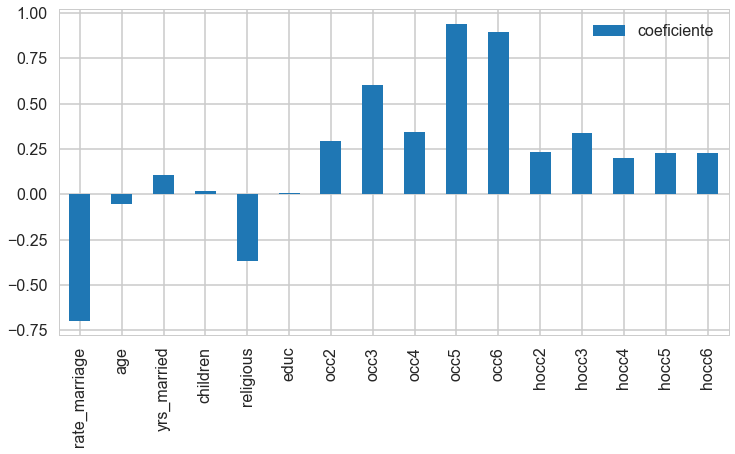

In [34]:
coeff_df.plot(kind='bar', figsize=(12,6))

##### O que podemos observar pelos coeficientes acima?

### Treinamento e validação

In [35]:
# Segmentando a base
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciando um objeto
log_model2 = LogisticRegression()

# Treinando o modelo
log_model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# Predizendo a classe das observações de teste
class_predict = log_model2.predict(X_test)

# Comparando as classes da predição e o gold, 
# ou seja, medindo a performance...
print (metrics.accuracy_score(y_test,class_predict))

0.7405778894472361


### Analise de resultados via matriz de confusão

In [37]:
# matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test, class_predict)
confusion_matrix

array([[1003,  104],
       [ 309,  176]])

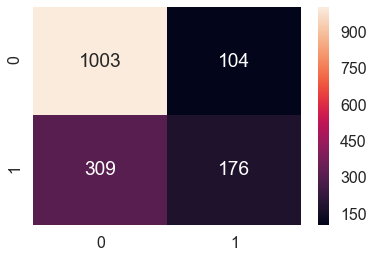

In [38]:
# Label gold na vertical, e label predição na horizontal
sns.heatmap(confusion_matrix, annot=True, fmt ='d')

In [39]:
print(metrics.classification_report(y_test, class_predict))

             precision    recall  f1-score   support

          0       0.76      0.91      0.83      1107
          1       0.63      0.36      0.46       485

avg / total       0.72      0.74      0.72      1592



In [40]:
confusion_matrix/confusion_matrix.sum()

array([[0.63002513, 0.06532663],
       [0.19409548, 0.11055276]])

## Area sobre a curva ROC

Também conhecido por **ROC_AUC**, **AUC_ROC**, ou **AUC**

In [47]:
y_pred = log_model2.predict_proba(X_test)[:,1]

In [46]:
from sklearn.metrics import roc_auc_score

In [48]:
roc_auc_score(y_test, y_pred)

0.7503925898321551

#### Quanto devemos acertar....

In [58]:
test_mean = y_test.mean()
test_mean

0.3146984924623116

In [59]:
# se não sabemos nada da pessoa, o melhor 'chute' seria jogar uma moeda com 32.2% de probabilidade de cara (label = 1)
# 32.2% é a media do vetor y (arredondado)

# nesse caso teriamos:
print('prob. verdadeiro positivo:', test_mean * test_mean)
print('prob. verdadeiro negativo:', (1- test_mean) * (1- test_mean))
print('prob. falso positivo:', (1- test_mean) * test_mean)
print('prob. falso negativo:', test_mean * (1- test_mean))

prob. verdadeiro positivo: 0.09903514115805158
prob. verdadeiro negativo: 0.4696381562334285
prob. falso positivo: 0.21566335130426
prob. falso negativo: 0.21566335130426


In [60]:
from random import random


confusion_chute_list = list()
for _ in range(10000):
    chute = [int(random() < test_mean) for i in range(len(y_test))]
    confusion_chute = metrics.confusion_matrix(y_test, chute)
    confusion_chute_list.append(confusion_chute/confusion_chute.sum())

np.array((confusion_chute_list)).sum(axis = 0)/10000

array([[0.46960188, 0.21569962],
       [0.21562337, 0.09907513]])